<a href="https://colab.research.google.com/github/Annieng184/Annieng184/blob/main/Covid_Case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Case Study**: Your are given the dataset on the number of **comfirmed**, **deaths**, and **recovery cases** from 2019 Novel Corona Virus. You are required to complete the following tasks 
![](https://www.aljazeera.com/mritems/Images/2020/3/4/b9d6e9c0f8774beda9ce21bb0eacbfe2_7.jpg)

In [ ]:
# Import Data and Libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from matplotlib.patches import Rectangle

confirmed  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
#total deaths pandas
deaths_identifiers = deaths.columns[:4]
deaths_values = deaths.columns[4:]
clean_deaths = deaths.melt(id_vars = deaths_identifiers,
                           value_vars = deaths_values,
                           var_name = 'Date',
                           value_name = 'Deaths').drop(columns = ['Province/State','Lat','Long'])

clean_deaths['Date'] = pd.to_datetime(clean_deaths['Date'])
latest_deaths = clean_deaths[clean_deaths['Date'] == (clean_deaths['Date'].max())].groupby('Country/Region')['Deaths'].sum().reset_index()
latest_deaths

,Country/Region,Deaths
0,Afghanistan,7777
1,Albania,3581
2,Algeria,6878
3,Andorra,154
4,Angola,1917
...,...,...
194,West Bank and Gaza,5694
195,Winter Olympics 2022,0
196,Yemen,2155
197,Zambia,4016


In [ ]:
#total confirmed pandas
confirmed_identifiers = confirmed.columns[:4]
confirmed_values = confirmed.columns[4:]
clean_confirmed = confirmed.melt(id_vars = confirmed_identifiers,
                           value_vars = confirmed_values,
                           var_name = 'Date',
                           value_name = 'Confirmed').drop(columns = ['Province/State','Lat','Long'])
clean_confirmed['Date'] = pd.to_datetime(clean_confirmed['Date'])
latest_confirmed = clean_confirmed[clean_confirmed['Date'] == (clean_confirmed['Date'].max())].groupby('Country/Region')['Confirmed'].sum().reset_index()
latest_confirmed

,Country/Region,Confirmed
0,Afghanistan,192906
1,Albania,328571
2,Algeria,270235
3,Andorra,46027
4,Angola,102636
...,...,...
194,West Bank and Gaza,698384
195,Winter Olympics 2022,535
196,Yemen,11925
197,Zambia,332822


In [ ]:
#total recoveries pandas
recoveries_identifiers = recoveries.columns[:4]
recoveries_values = recoveries.columns[4:]
clean_recoveries = recoveries.melt(id_vars = recoveries_identifiers,
                           value_vars = recoveries_values,
                           var_name = 'Date',
                           value_name = 'Recoveries').drop(columns = ['Province/State','Lat','Long'])
clean_recoveries['Date'] = pd.to_datetime(clean_recoveries['Date']) #change to datetime
new_recoveries = clean_recoveries[clean_recoveries['Date'] <= '2021-08-04'] #date that stop recording recovery cases
latest_recoveries = new_recoveries[new_recoveries['Date'] == (new_recoveries['Date'].max())].groupby('Country/Region')['Recoveries'].sum().reset_index()
latest_recoveries

,Country/Region,Recoveries
0,Afghanistan,82586
1,Albania,130314
2,Algeria,118409
3,Andorra,14380
4,Angola,39582
...,...,...
194,West Bank and Gaza,312320
195,Winter Olympics 2022,0
196,Yemen,4251
197,Zambia,189658


In [ ]:
#Merge 3 tables into 1
deaths_confirmed = pd.merge(latest_deaths, latest_confirmed, on = ['Country/Region'], how='inner')
final_table = pd.merge(deaths_confirmed, latest_recoveries, on = ['Country/Region'], how='inner')
final_table


,Country/Region,Deaths,Confirmed,Recoveries
0,Afghanistan,7777,192906,82586
1,Albania,3581,328571,130314
2,Algeria,6878,270235,118409
3,Andorra,154,46027,14380
4,Angola,1917,102636,39582
...,...,...,...,...
194,West Bank and Gaza,5694,698384,312320
195,Winter Olympics 2022,0,535,0
196,Yemen,2155,11925,4251
197,Zambia,4016,332822,189658


In [ ]:
final_table.columns = ['Country', 'Deaths', 'Confirmed', 'Recoveries']
final_table.head(5)

,Country,Deaths,Confirmed,Recoveries
0,Afghanistan,7777,192906,82586
1,Albania,3581,328571,130314
2,Algeria,6878,270235,118409
3,Andorra,154,46027,14380
4,Angola,1917,102636,39582


*Data Dictionary*

Make sure you read this carefully. This will help you a lot.

| Variable | Definition |
|:--:|:--:|
| Province/State | Name of Province and State within the Country |
| Country/Region | Name of Country |
| Lat | Latitude of the Province |
| Long | Longitude of the Province |
| Day Columns | Report data in cummulative sum |

####Write a **function** that reports the __latest__ situation of the Corona Virus in a __given country__.

The function takes one argument as input - the country where the report is from, and prints out the following information:
- The country where the report is from
- Total confirmed cases
- Total death
- Total recovered

In [ ]:
def latest_situation(country):
  #Total deaths pandas
  deaths_identifiers = deaths.columns[:4]
  deaths_values = deaths.columns[4:]
  clean_deaths = deaths.melt(id_vars = deaths_identifiers,
                           value_vars = deaths_values,
                           var_name = 'Date',
                           value_name = 'Deaths').drop(columns = ['Province/State','Lat','Long'])
  clean_deaths['Date'] = pd.to_datetime(clean_deaths['Date'])
  latest_deaths = clean_deaths[clean_deaths['Date'] == (clean_deaths['Date'].max())].groupby('Country/Region')['Deaths'].sum().reset_index()
  #Total confirmed pandas
  confirmed_identifiers = confirmed.columns[:4]
  confirmed_values = confirmed.columns[4:]
  clean_confirmed = confirmed.melt(id_vars = confirmed_identifiers,
                           value_vars = confirmed_values,
                           var_name = 'Date',
                           value_name = 'Confirmed').drop(columns = ['Province/State','Lat','Long'])
  clean_confirmed['Date'] = pd.to_datetime(clean_confirmed['Date'])
  latest_confirmed = clean_confirmed[clean_confirmed['Date'] == (clean_confirmed['Date'].max())].groupby('Country/Region')['Confirmed'].sum().reset_index()
  #Total recoveries pandas
  recoveries_identifiers = recoveries.columns[:4]
  recoveries_values = recoveries.columns[4:]
  clean_recoveries = recoveries.melt(id_vars = recoveries_identifiers,
                           value_vars = recoveries_values,
                           var_name = 'Date',
                           value_name = 'Recoveries').drop(columns = ['Province/State','Lat','Long'])
  clean_recoveries['Date'] = pd.to_datetime(clean_recoveries['Date']) #change to datetime
  new_recoveries = clean_recoveries[clean_recoveries['Date'] <= '2021-08-04'] #date that stop recording recovery cases
  latest_recoveries = new_recoveries[new_recoveries['Date'] == (new_recoveries['Date'].max())].groupby('Country/Region')['Recoveries'].sum().reset_index()
  #Merge 3 tables into 1
  deaths_confirmed = pd.merge(latest_deaths, latest_confirmed, on = ['Country/Region'], how='inner')
  final_table = pd.merge(deaths_confirmed, latest_recoveries, on = ['Country/Region'], how='inner')
  #Rename column 'Country/Region' to shorter form 'Country'
  final_table.columns = ['Country', 'Deaths', 'Confirmed', 'Recoveries']

  for index, row in final_table.iterrows():
    return final_table[final_table['Country'] == country]

latest_situation('Vietnam')

,Country,Deaths,Confirmed,Recoveries
193,Vietnam,43113,11405711,54332


####Visualize the situation **until October 31st, 2020**. 

Determine the top 5 countries by the total number of confirmed cases **until October 31st, 2020**. 

From those 5 countries, plot the charts for each of them visualising the number of confirmed, death and recovered cases over time from the beginning **until October 31st, 2020**.  

*There should be three seperate plots for confirmed, death and recovered.*

In [ ]:
#Step 1: Find top 5 countries in Confirmed, Deaths, Recovered cases
#Step 2: Create a table with top 5 countries and date from 2020-01-22 to 2020-10-31

In [ ]:
#Define top5 countries with highest deaths
oct31_20_deaths = clean_deaths[clean_deaths['Date'] <= '2020-10-31']
oct31_20_deaths_top5 = oct31_20_deaths.groupby(['Country/Region', 'Date'])['Deaths'].sum()[oct31_20_deaths.groupby('Country/Region')['Deaths'].sum().sort_values(ascending = False).head(5).keys()].reset_index()
oct31_20_deaths_top5

,Country/Region,Date,Deaths
0,US,2020-01-22,0
1,US,2020-01-23,0
2,US,2020-01-24,0
3,US,2020-01-25,0
4,US,2020-01-26,0
...,...,...,...
1415,India,2020-10-27,120010
1416,India,2020-10-28,120527
1417,India,2020-10-29,121090
1418,India,2020-10-30,121641


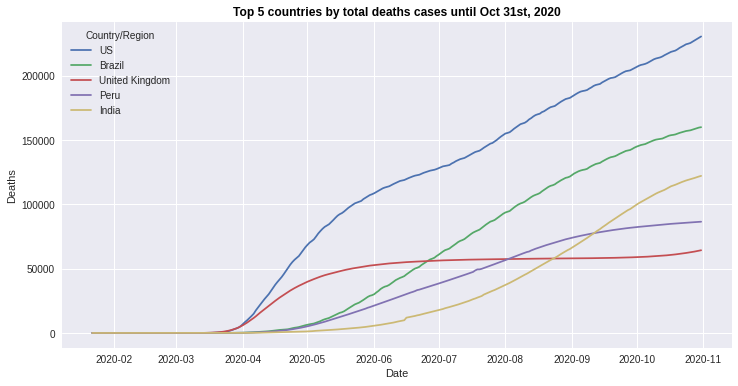

In [ ]:
# Line plot top 5 countries with most deaths cases 
plt.figure(figsize = (12,6))
sns.lineplot(data = oct31_20_deaths_top5,
             x = 'Date', 
             y = 'Deaths',
             hue = 'Country/Region')
plt.title('Top 5 countries by total deaths cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()

In [ ]:
#Define top5 countries with highest confirmed case
oct31_20_confirmed = clean_confirmed[clean_confirmed['Date'] <= '2020-10-31']
oct31_20_confirmed_top5 = oct31_20_confirmed.groupby(['Country/Region', 'Date'])['Confirmed'].sum()[oct31_20_confirmed.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending = False).head(5).keys()].reset_index()
oct31_20_confirmed_top5


,Country/Region,Date,Confirmed
0,US,2020-01-22,1
1,US,2020-01-23,1
2,US,2020-01-24,2
3,US,2020-01-25,2
4,US,2020-01-26,5
...,...,...,...
1415,Spain,2020-10-27,1116738
1416,Spain,2020-10-28,1136503
1417,Spain,2020-10-29,1160083
1418,Spain,2020-10-30,1185678


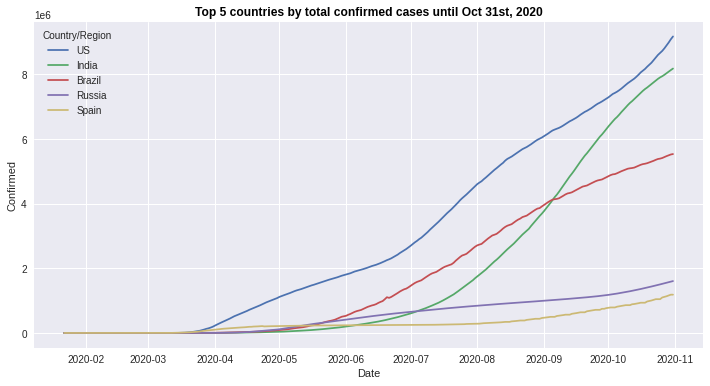

In [ ]:
# Line plot top 5 countries with most confirmed cases 
plt.figure(figsize = (12,6))
sns.lineplot(data = oct31_20_confirmed_top5,
             x = 'Date', 
             y = 'Confirmed',
             hue = 'Country/Region')

plt.title('Top 5 countries by total confirmed cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()

In [ ]:
clean_recoveries

,Country/Region,Date,Recoveries
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
256765,West Bank and Gaza,2022-08-29,0
256766,Winter Olympics 2022,2022-08-29,0
256767,Yemen,2022-08-29,0
256768,Zambia,2022-08-29,0


In [ ]:
#Define top5 countries with highest recovery case
oct31_20_recoveries = clean_recoveries[clean_recoveries['Date'] <= '2020-10-31']
oct31_20_recoveries_top5 = oct31_20_recoveries.groupby(['Country/Region', 'Date'])['Recoveries'].sum()[oct31_20_recoveries.groupby('Country/Region')['Recoveries'].sum().sort_values(ascending = False).head(5).keys()].reset_index()
oct31_20_recoveries_top5

,Country/Region,Date,Recoveries
0,India,2020-01-22,0
1,India,2020-01-23,0
2,India,2020-01-24,0
3,India,2020-01-25,0
4,India,2020-01-26,0
...,...,...,...
1415,Mexico,2020-10-27,763105
1416,Mexico,2020-10-28,765128
1417,Mexico,2020-10-29,770007
1418,Mexico,2020-10-30,774567


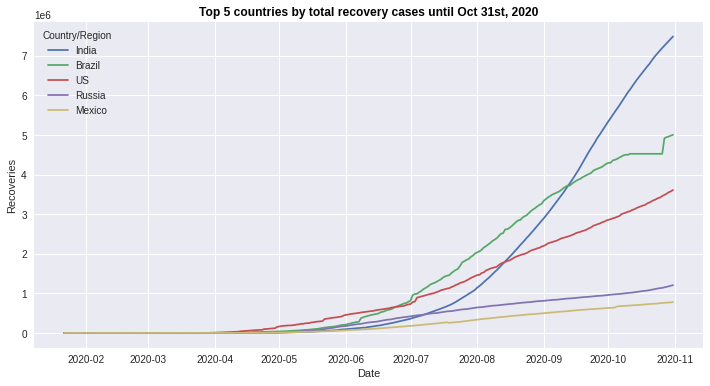

In [ ]:
# Line plot top 5 countries with most recovery cases 
plt.figure(figsize = (12,6))
sns.lineplot(data = oct31_20_recoveries_top5,
             x = 'Date', 
             y = 'Recoveries',
             hue = 'Country/Region')
plt.title('Top 5 countries by total recovery cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()

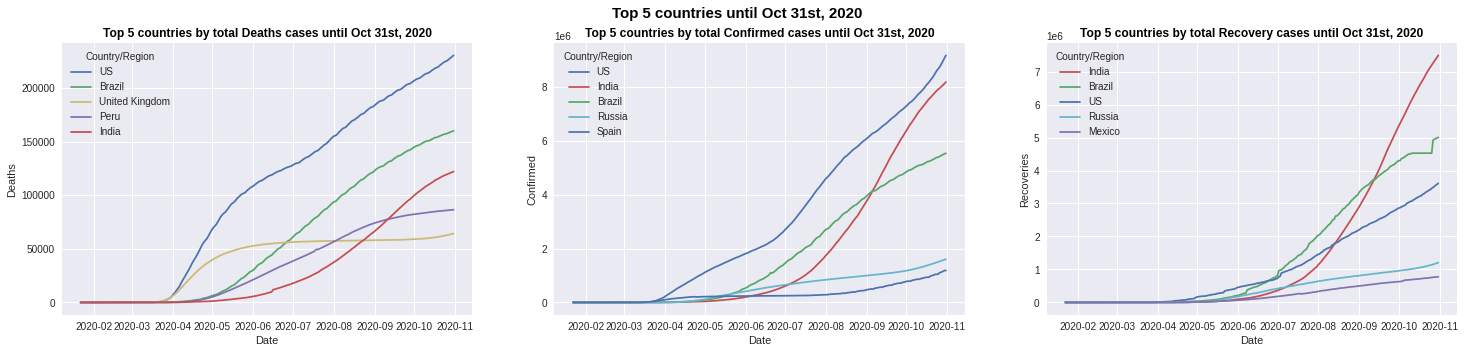

In [ ]:
#Combine 3 tables into 1 frame
palette ={"US": "C0", "Brazil": "C1", "India": "C2", 'Peru': 'C3', 'United Kingdom': 'C4', 'Russia': 'C5', 'Spain': 'C6', 'Mexico': 'C9'}

plt.figure(figsize = (25,5))
plt.suptitle('Top 5 countries until Oct 31st, 2020', size = 15, color = 'black', fontweight = 'bold')
plt.subplot(131)
sns.lineplot(data = oct31_20_deaths_top5,
             x = 'Date', 
             y = 'Deaths',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total Deaths cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')

plt.subplot(132)
sns.lineplot(data = oct31_20_confirmed_top5,
             x = 'Date', 
             y = 'Confirmed',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total Confirmed cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')

plt.subplot(133)
sns.lineplot(data = oct31_20_recoveries_top5,
             x = 'Date', 
             y = 'Recoveries',
             hue = 'Country/Region', palette = palette)
plt.title('Top 5 countries by total Recovery cases until Oct 31st, 2020', size = 12, color = 'black', fontweight = 'bold')
plt.show()